## Table of Contents <a id="toc">

* [Updated Script](#new_daily)
* [Save](#save)

## Initial Imports

In [1]:
import pandas as pd
import pickle
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('poster')
%matplotlib inline

In [2]:
pwd

'/Users/matthewmitchell/Documents/JHU-COVID-19-Processing/EDA_DEV_Notebooks'

##  Archived COVID-19 DATASET (Contains Complete Data Through March 22nd)

In [3]:
ls COVID-19/archived_data/archived_time_series/

ls: COVID-19/archived_data/archived_time_series/: No such file or directory


In [4]:
pwd

'/Users/matthewmitchell/Documents/JHU-COVID-19-Processing/EDA_DEV_Notebooks'

## Updated Process Mar 26th <a id ="new_daily">
    
[Table Of Contents](#toc)

### Date Notes

Found an error to French Polynesia Data on March 23rd:  
https://github.com/CSSEGISandData/COVID-19/issues/1818

## Import State Lat Long Dicts <a id="latLongDicts">

[Table of Contents](#toc)

In [8]:
#Lat
pkl_file = open('../states_lat_dict.pkl', 'rb')
states_lat_dict = pickle.load(pkl_file)
pkl_file.close()

#Long
pkl_file = open('../states_long_dict.pkl', 'rb')
states_long_dict = pickle.load(pkl_file)
pkl_file.close()


#Test
state = 'Alabama'
print(states_lat_dict[state] , states_long_dict[state])

32.3182 -86.9023


In [9]:
#Import Baseline File
jhuBaseDir = '/Users/matthewmitchell/Documents/COVID-19/'
df = pd.read_csv(jhuBaseDir+'archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv')

dfs = [] #Make a list of dfs
#Iterate through desired date columns and create df
dates = ['1/22/20','1/26/20', '2/2/20', '2/9/20', '2/16/20', '2/23/20',
         '3/1/20','3/5/20','3/8/20','3/12/20', '3/16/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
         '3/22/20']
standard_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
for col in dates:
    temp = df[standard_cols+[col]]
    temp.columns = ['Province/State', 'Country/Region', 'Lat', 'Long', 'ConfirmedCases']
    temp['Date'] = col
    #Append df
    dfs.append(temp)
#Concat Dataframes
transformed = pd.concat(dfs, ignore_index=True)
print(len(transformed))
transformed.Date = pd.to_datetime(transformed.Date)
transformed.Date = transformed.Date.dt.strftime('%Y-%m-%d')

daily_dir = jhuBaseDir + 'csse_covid_19_data/csse_covid_19_daily_reports/'
# dates = ['03-{}-2020'.format(i) for i in range(23,31)]

d1 = date(2020, 3, 23)  # start date
y, m, d = [int(x) for x in datetime.now().strftime('%Y-%m-%d').split('-')]
d2 = date(y, m, d)  # end date
delta = d2 - d1         # timedelta

dates = []

for i in range(delta.days):
    d = d1 + timedelta(i)
    dates.append(d.strftime('%m-%d-%Y'))

files = [date+'.csv' for date in dates]
# dfs = []
for i, file in enumerate(files):
    daily = pd.read_csv(daily_dir+file)
    columns = ['Province_State', 'Country_Region', 'Last_Update', 'Combined_Key',
               'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active'
              ]
    daily = daily.rename({'Province_State':'Province/State',
                         'Country_Region':'Country/Region',
                         'Confirmed':'ConfirmedCases',
                         'Long_':'Long'}, axis=1)
    numericalCols = ['ConfirmedCases', 'Deaths', 'Recovered', 'Active']

    us = daily[daily['Country/Region']=='US']
    us = us.groupby(['Province/State', 'Country/Region'])['ConfirmedCases'].sum().reset_index()
    us['Lat'] = us['Province/State'].map(states_lat_dict)
    us['Long'] = us['Province/State'].map(states_long_dict)
    other = daily[daily['Country/Region']!='US']
    daily = pd.concat([other, us])
    daily['Date'] = dates[i]
    daily['Date'] = pd.to_datetime(daily['Date'])
    daily['Date'] = daily['Date'].dt.strftime('%Y-%m-%d')
   
    daily = daily[transformed.columns]
    print('Current Length:', len(transformed))
    print('Adding {} rows. Next length should read: {}'.format(len(daily), len(transformed)+len(daily)))
    transformed = transformed.append(daily, ignore_index=True)

idx_to_update = transformed[(transformed['Province/State']=='French Polynesia')
           & (transformed['Date']=='2020-03-23')].index[0]
transformed.iat[idx_to_update, 4] = 25

print(len(transformed))
print(transformed.Date.value_counts())

/Users/matthewmitchell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/matthewmitchell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



8016
Current Length: 8016
Adding 294 rows. Next length should read: 8310
Current Length: 8310
Adding 298 rows. Next length should read: 8608
Current Length: 8608
Adding 302 rows. Next length should read: 8910
Current Length: 8910
Adding 306 rows. Next length should read: 9216
Current Length: 9216
Adding 307 rows. Next length should read: 9523
Current Length: 9523
Adding 311 rows. Next length should read: 9834
Current Length: 9834
Adding 311 rows. Next length should read: 10145
Current Length: 10145
Adding 312 rows. Next length should read: 10457
Current Length: 10457
Adding 313 rows. Next length should read: 10770
Current Length: 10770
Adding 313 rows. Next length should read: 11083
Current Length: 11083
Adding 315 rows. Next length should read: 11398
Current Length: 11398
Adding 315 rows. Next length should read: 11713
Current Length: 11713
Adding 316 rows. Next length should read: 12029
Current Length: 12029
Adding 319 rows. Next length should read: 12348
Current Length: 12348
Adding

## Data Checks <a id="dataChecks">
[Table of Contents](#toc)

In [31]:
transformed.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date
0,NaN,Thailand,15.0000,101.0000,2,2020-01-22
1,NaN,Japan,36.0000,138.0000,2,2020-01-22
2,NaN,Singapore,1.2833,103.8333,0,2020-01-22
3,NaN,Nepal,28.1667,84.2500,0,2020-01-22
4,NaN,Malaysia,2.5000,112.5000,0,2020-01-22


In [10]:
transformed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'ConfirmedCases',
       'Date'],
      dtype='object')

In [14]:
len(transformed)

21967

In [15]:
locCols = ['Province/State', 'Country/Region', 'Lat', 'Long']
transformed['NewCases'] = transformed.groupby(locCols)['ConfirmedCases'].diff()

In [16]:
transformed

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date,NewCases
0,NaN,Thailand,15.0000,101.0000,2,2020-01-22,NaN
1,NaN,Japan,36.0000,138.0000,2,2020-01-22,NaN
2,NaN,Singapore,1.2833,103.8333,0,2020-01-22,NaN
3,NaN,Nepal,28.1667,84.2500,0,2020-01-22,NaN
4,NaN,Malaysia,2.5000,112.5000,0,2020-01-22,NaN
...,...,...,...,...,...,...,...
21962,Virginia,US,37.7693,-78.1700,20257,2020-05-05,764.0
21963,Washington,US,47.4009,-121.4905,15594,2020-05-05,132.0
21964,West Virginia,US,38.4912,-80.9545,1246,2020-05-05,22.0
21965,Wisconsin,US,44.2685,-89.6165,8566,2020-05-05,330.0


In [ ]:
transformed['NewCases']

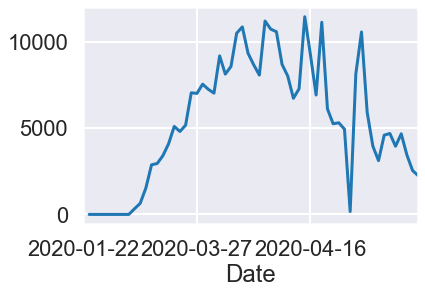

In [20]:
temp = transformed[transformed['Province/State']=='New York']
temp = temp.set_index('Date')
temp['NewCases'].plot()

In [25]:
temp

,Province/State,Country/Region,Lat,Long,ConfirmedCases,NewCases
Date,,,,,,
2020-01-22,Tennessee,US,35.7478,-86.6923,0,NaN
2020-01-26,Tennessee,US,35.7478,-86.6923,0,0.0
2020-02-02,Tennessee,US,35.7478,-86.6923,0,0.0
2020-02-09,Tennessee,US,35.7478,-86.6923,0,0.0
2020-02-16,Tennessee,US,35.7478,-86.6923,0,0.0
2020-02-23,Tennessee,US,35.7478,-86.6923,0,0.0
2020-03-01,Tennessee,US,35.7478,-86.6923,0,0.0
2020-03-05,Tennessee,US,35.7478,-86.6923,0,0.0
2020-03-08,Tennessee,US,35.7478,-86.6923,0,0.0


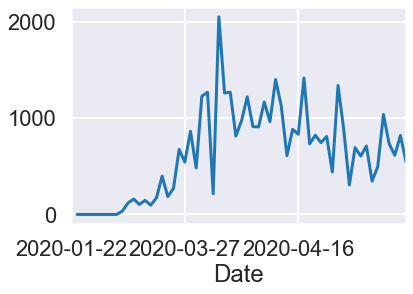

In [26]:
temp = transformed[transformed['Province/State']=='Florida']
temp = temp.set_index('Date')
temp['NewCases'].plot()

In [28]:
states = transformed[transformed['Country/Region']=='US']['Province/State'].unique()
len(states)

252

In [33]:
len()

51

In [34]:
states = ['Washington', 'New York', 'California', 'Massachusetts',
        'Georgia', 'Colorado',
       'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming', 'Alabama']


In [45]:
states = transformed[transformed['Province/State'].isin(states)].groupby('Province/State')['ConfirmedCases'].max().sort_values(ascending=False).index

In [54]:
plt.subplot?

In [60]:
fig.delaxes?

In [ ]:
lis

In [71]:
plt.savefig?

In [90]:
for i in range(ncols-toRemove,ncols):
    print(i)

2
3
4
5
6


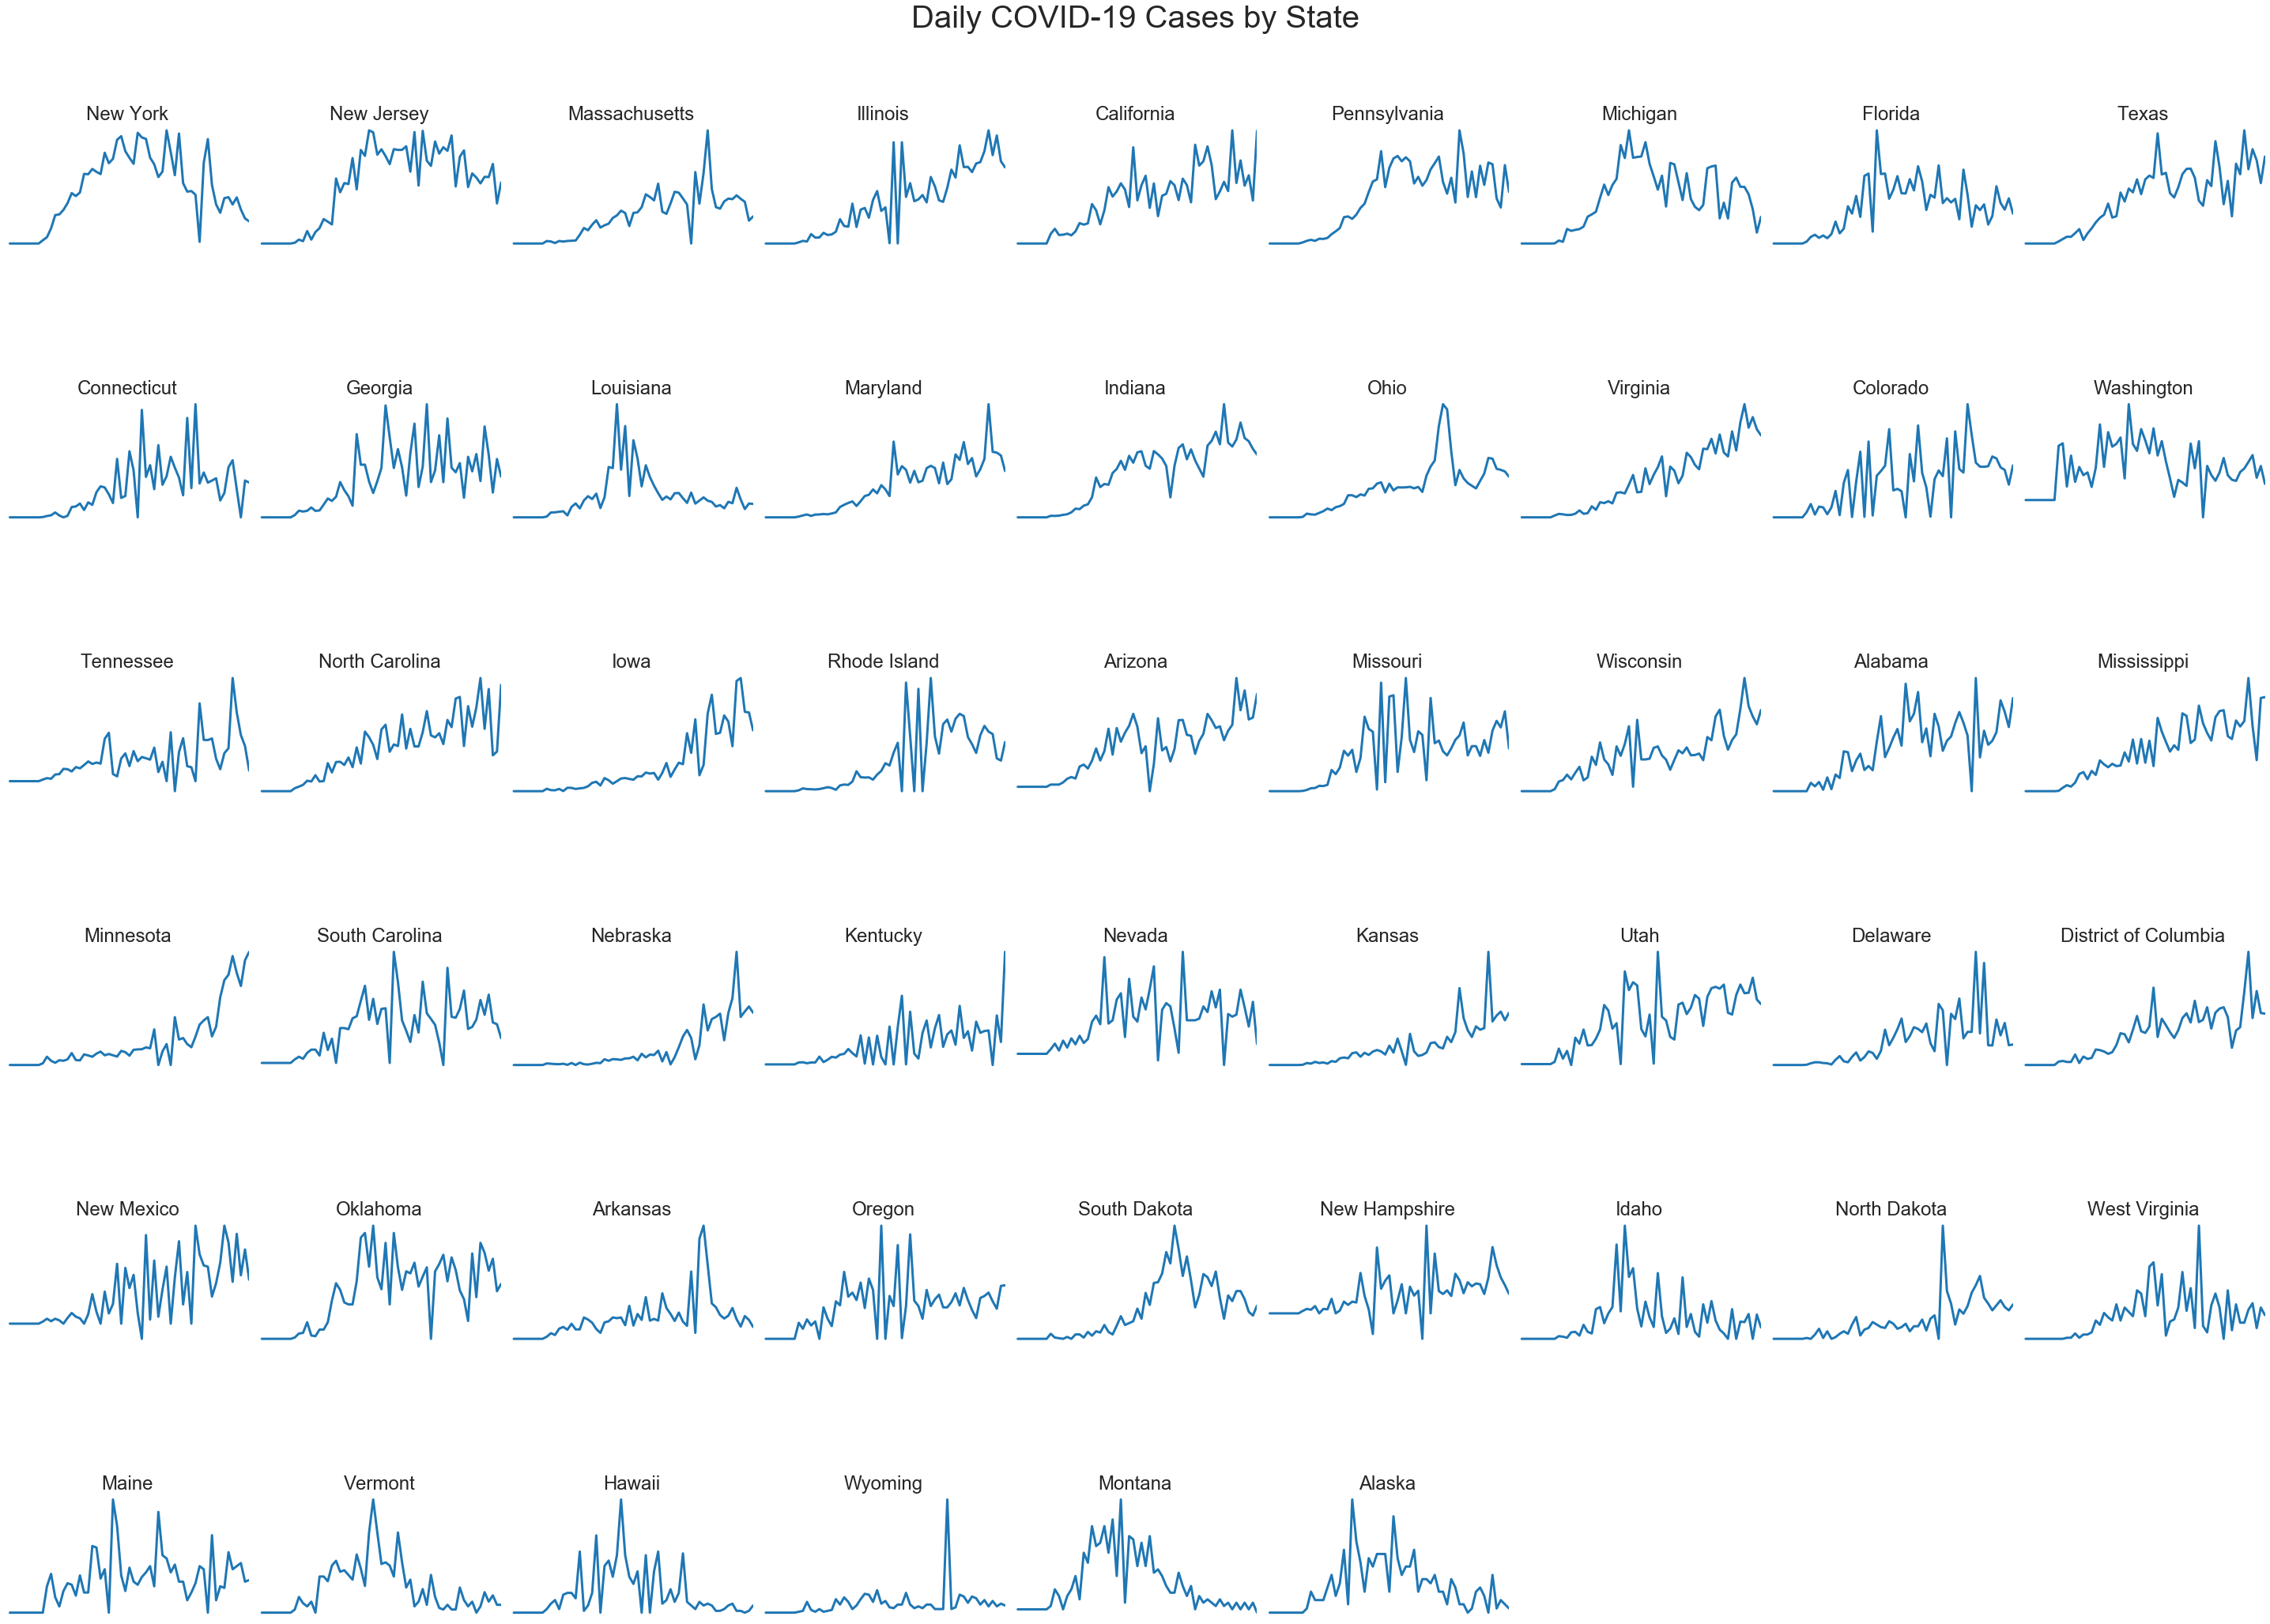

In [94]:
nrows = 6
ncols = 9
lastRow = nrows - 1
toRemove = nrows*ncols - len(states)
fig, axes = plt.subplots(nrows, ncols, figsize=(40,30))
for n, state in enumerate(states):
    i = n // ncols
    j = n % ncols
    ax = axes[i,j]
    ax.set_title(state)
    ax.set_axis_off()
    temp = transformed[transformed['Province/State']==state]
    temp = temp.set_index('Date')
    temp['NewCases'].plot(ax=ax)
for i in range(ncols-toRemove,ncols):
    fig.delaxes(axes[lastRow,i])
fig.suptitle("Daily COVID-19 Cases by State", fontsize=40, y=.95, weight='bold');
plt.tight_layout();
plt.subplots_adjust(top=0.88, hspace = 1.2)
plt.savefig('StateDailyCases.png', facecolor='white')
plt.show()

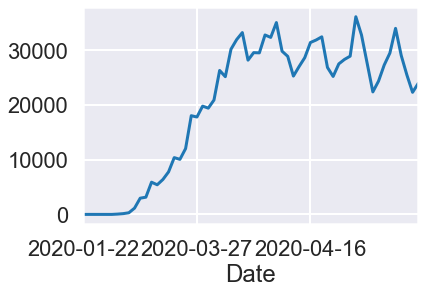

In [23]:
transformed[transformed['Country/Region']=='US'].groupby('Date')['NewCases'].sum().plot()

In [17]:
transformed[transformed['Province/State']=='French Polynesia']

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date,NewCases
405,French Polynesia,France,-17.6797,149.4068,0,2020-01-22,NaN
906,French Polynesia,France,-17.6797,149.4068,0,2020-01-26,0.0
1407,French Polynesia,France,-17.6797,149.4068,0,2020-02-02,0.0
1908,French Polynesia,France,-17.6797,149.4068,0,2020-02-09,0.0
2409,French Polynesia,France,-17.6797,149.4068,0,2020-02-16,0.0
2910,French Polynesia,France,-17.6797,149.4068,0,2020-02-23,0.0
3411,French Polynesia,France,-17.6797,149.4068,0,2020-03-01,0.0
3912,French Polynesia,France,-17.6797,149.4068,0,2020-03-05,0.0
4413,French Polynesia,France,-17.6797,149.4068,0,2020-03-08,0.0
4914,French Polynesia,France,-17.6797,149.4068,0,2020-03-12,0.0


## Save to File <a id="save">
    
[Table of Contents](#toc)

In [40]:
timedelta

TypeError: 'member_descriptor' object is not callable

In [42]:
yesterday = datetime.now()-timedelta(1)


'Apr05'

In [44]:
dir_ = '/home/matt/Documents/Projects/WebDev/mmitchell_net/FlaskApp/static/data/'
yesterday = datetime.now()-timedelta(1)
filename = 'Confirmed_Cases_through_{}.csv'.format(yesterday.strftime('%b%d'))
# print(filename)
transformed.to_csv(dir_+filename, index=False)